<a href="https://colab.research.google.com/github/priyanka12177/data_projects-ADVDS/blob/Project6/project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
# NumPy has support for large, multi-dimensional arrays and matrices, along with 
# a large collection of high-level mathematical functions to operate on these arrays.
# Import matplotlib  to visualize the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read  file from github into a dataframe
# dataset contains 2126 records of features extracted from Cardiotocogram exams, which were classified by three expert obstetricians 
df = pd.read_csv('https://raw.githubusercontent.com/priyanka12177/data_projects-ADVDS/Project6/fetal_health.csv')

In [3]:
# head function is used to get the first 5 rows which displays the columns and data
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
# info function is used to get the data type information for each column in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

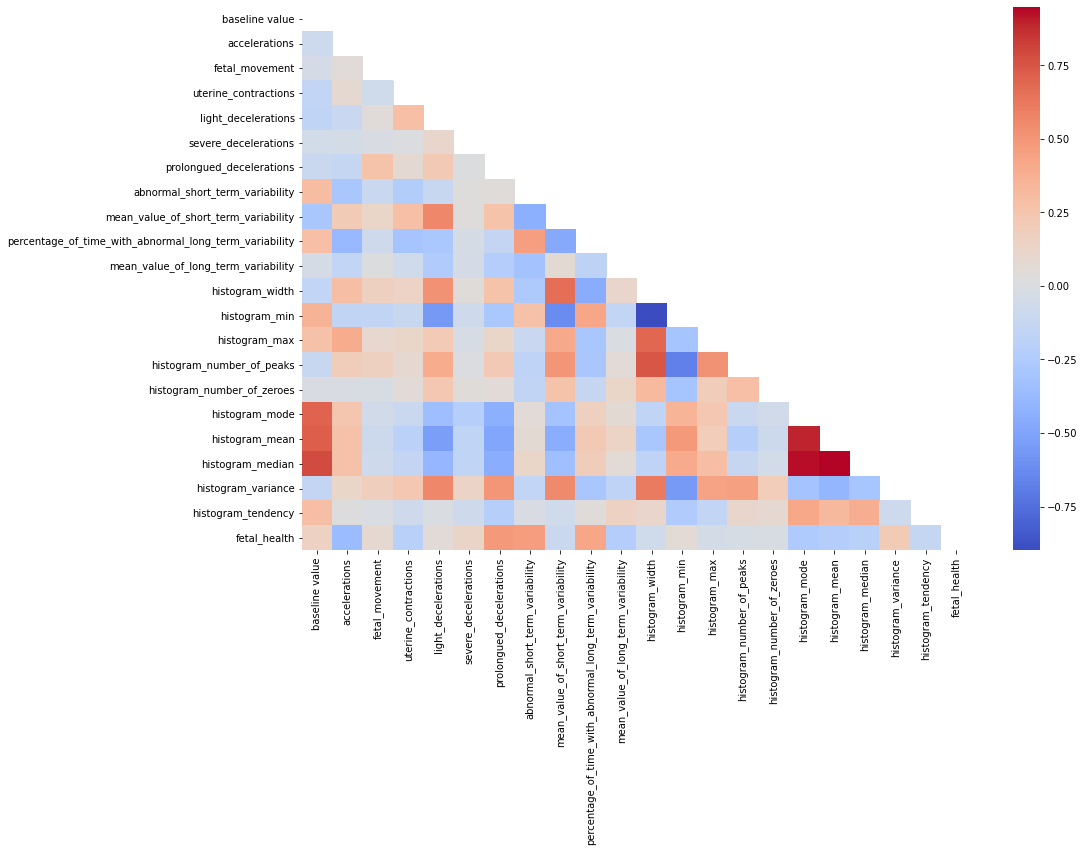

In [5]:
# defining figure size
plt.figure(figsize=(15,10))
# perfoming pair-wise Pearson correlation of all the columns in the dataframe 
import seaborn as sns
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
#heat map of correlation values 
g = sns.heatmap(df.corr(),mask = mask, cmap = "coolwarm")
# prolonged_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability has highest correlation with fetal_health

In [6]:
# check the class distribution
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

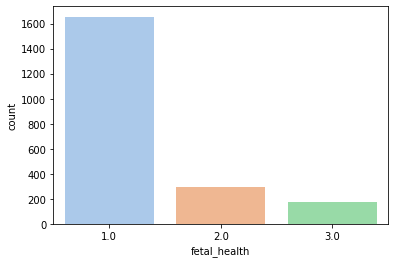

In [7]:
# label frequencies 
# Plotting the frequencies using seaborn package to see how the class is distributed
import seaborn as sns
sns.countplot(x = 'fetal_health', palette = 'pastel', data=df)

In [8]:
#checking missing values for all the columns in the dataframe
df.isnull().sum().sort_values( ascending=False)
# No missing values

baseline value                                            0
accelerations                                             0
histogram_tendency                                        0
histogram_variance                                        0
histogram_median                                          0
histogram_mean                                            0
histogram_mode                                            0
histogram_number_of_zeroes                                0
histogram_number_of_peaks                                 0
histogram_max                                             0
histogram_min                                             0
histogram_width                                           0
mean_value_of_long_term_variability                       0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_short_term_variability                      0
abnormal_short_term_variability                           0
prolongued_decelerations                

In [9]:
#Assigning input variables to X by excluding target column
X = df.drop('fetal_health', axis=1)

#Assigning target variables to Y
Y = df['fetal_health']

In [10]:
# StandardScale the data
# import StandardScaler function
from sklearn.preprocessing import StandardScaler

# also try MinMaxScaler
scaler = StandardScaler()

#fit the model
scaler.fit(X)

#scaled data by performing standardizations
scaled_data = scaler.transform(X)

#creating data frame from scaled_data array
scaled_data2 = pd.DataFrame(scaled_data,columns=X.columns,index=X.index)

In [11]:
# Assigning scaled data to variable X1 by excluding target column
X1 = scaled_data2


# Convert target Y to one hot encoded Y for Neural Network
Y1 = pd.get_dummies(Y)

In [12]:
# Dataset is split into training by 80% and testing  with 20% 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.20, random_state = 0)

# converting train data set to array values for the model input
X_train = X_train.values
# converting train data set to array values for the model input
X_test = X_test.values


# Examine the train and test dataset sizes
X_train.shape, X_test.shape

((1700, 21), (426, 21))

In [13]:
# Examine the train and test dataset sizes
Y_train.shape, Y_test.shape

((1700, 3), (426, 3))

In [14]:
# importing functions from keras package
from keras import models
from keras.layers import Dense, Dropout
#from keras.utils import to_categorical
#from keras.utils.vis_utils import model_to_dot
#from IPython.display import SVG

In [15]:
# creating sequential model with 15 neurons in the input layer,15 hidden layer and 3 in the output layer
model = models.Sequential()
model.add(Dense(15, activation='relu', input_dim = 21 ) )
model.add(Dense(15, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile sequential neuron model with adam optimizer and accuracy as metrics
model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                 )

# creating validation data using top 180 rows
X_val = X_train[:180]
Y_val = Y_train[:180]

# Assigning remaining data to train set
X_train_cut = X_train[180:]
Y_train_cut = Y_train[180:]

# Fitting the model with 50 epochs and 10 batch sizes
history = model.fit(X_train, Y_train, 
                        epochs=50,
                        batch_size=10,
                    validation_data = (X_val, Y_val),verbose=0
                       )

In [16]:
# evaluating results on the test data set
result = model.evaluate(X_test, Y_test)
result

14/14 [==============================] - 0s 2ms/step - loss: 0.2622 - accuracy: 0.9061


[0.26217764616012573, 0.9061033129692078]

In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
# predicting the model on test data
y_pred = model.predict(X_test)



In [18]:
# arranging data for confusion matrix by converting to ssingle value
predicted = np.argmax(y_pred, axis=1)
test = Y_test.values.argmax(axis=1)
# printing confusion matrix
confusion_matrix(test,predicted)




array([[313,   7,   6],
       [ 17,  40,   1],
       [  2,   7,  33]])

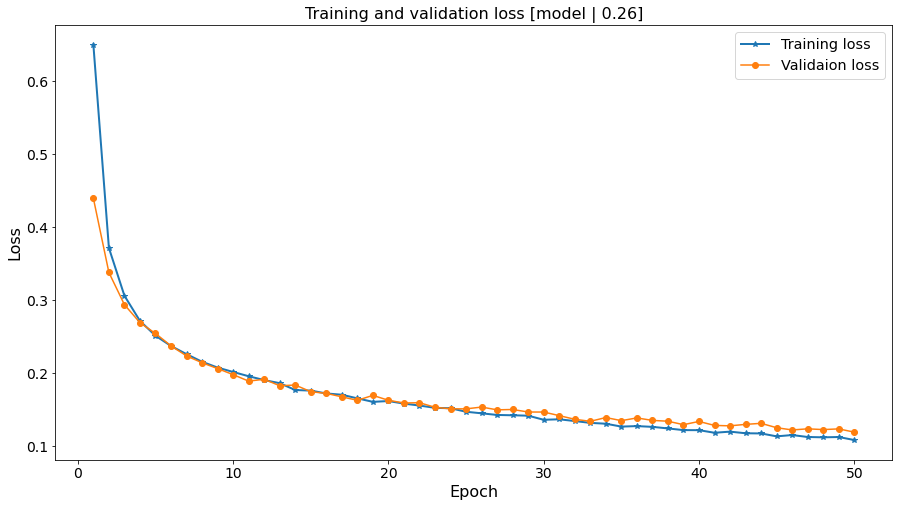

<Figure size 432x288 with 0 Axes>

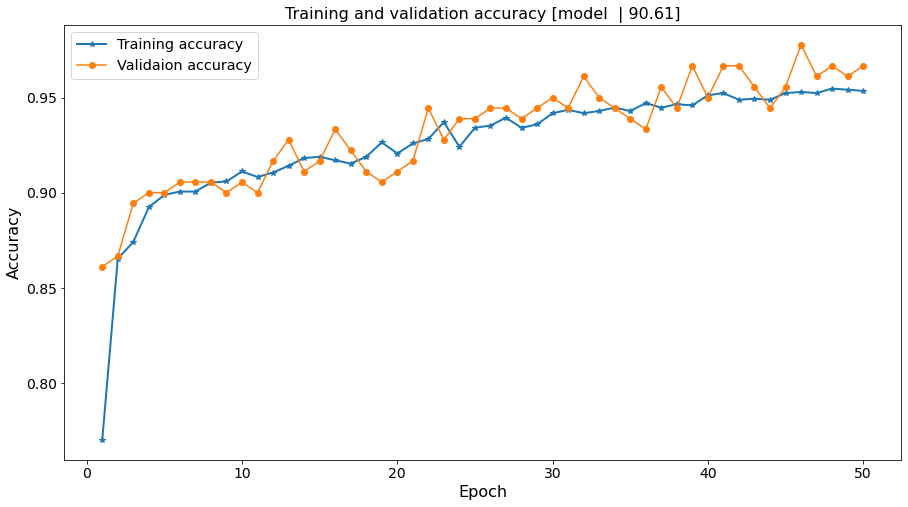

<Figure size 432x288 with 0 Axes>

In [19]:
# Assigning the loss values at different epochs
loss = history.history['loss']
val_loss = history.history['val_loss']

# Assigning the accuracy values at different epochs   
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Assigning the metrics values at different epochs      
metrics = history.history['accuracy']
epochs = range(1, len(metrics) + 1) 

# plotting training and validation loss at different epochs
plt.figure(figsize=(15,8))
plt.plot(epochs, loss, color='tab:blue', linestyle='-', linewidth=2, marker='*', label='Training loss')
plt.plot(epochs, val_loss, color='tab:orange', linestyle='-', marker='o', label='Validaion loss')
plt.title('Training and validation loss [model | {:.2f}]'.format(result[0]), fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc='upper right', fontsize='x-large')
plt.tick_params(labelsize=14)
plt.show()
plt.clf()

# plotting training and validation accuracy at different epochs    
plt.figure(figsize=(15,8))
plt.plot(epochs, accuracy, color='tab:blue', linestyle='-', linewidth=2, marker='*', label='Training accuracy')
plt.plot(epochs, val_accuracy, color='tab:orange', linestyle='-', marker='o', label='Validaion accuracy')
plt.title('Training and validation accuracy [model  | {:.2f}]'.format(result[1]*100), fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(loc='upper left', fontsize='x-large')
plt.tick_params(labelsize=14)
plt.show()
plt.clf()

In [20]:
# running k fold cross validation
# Object to describe the result
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def baseline_model():
    # Create model here
    model = models.Sequential()
    model.add(Dense(15, input_dim = 21, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True)
from keras.wrappers.scikit_learn import KerasClassifier


estimator = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size = 10, verbose = 0)
# Try different values of splits e.g., 10
results = cross_val_score(estimator, X1, Y1, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Result: 91.35% (0.70%)


In [21]:
# created model with 2 hidden layers
# Object to describe the result
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def baseline_model():
    # Create model here
    model = models.Sequential()
    model.add(Dense(15, input_dim = 21, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True)
from keras.wrappers.scikit_learn import KerasClassifier


estimator = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size = 10, verbose = 0)
# Try different values of splits e.g., 10
results = cross_val_score(estimator, X1, Y1, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
   
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Result: 91.35% (1.52%)


In [22]:
# created model with 3 hidden layers
# Object to describe the result
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def baseline_model():
    # Create model here
    model = models.Sequential()
    model.add(Dense(15, input_dim = 21, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True)
from keras.wrappers.scikit_learn import KerasClassifier


estimator = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size = 10, verbose = 0)
# Try different values of splits e.g., 10
results = cross_val_score(estimator, X1, Y1, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Result: 91.68% (1.17%)


In [23]:
# created model with 1 hidden layer of 25 neurons
# Object to describe the result
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def baseline_model():
    # Create model here
    model = models.Sequential()
    model.add(Dense(15, input_dim = 21, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(25, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True)
from keras.wrappers.scikit_learn import KerasClassifier


estimator = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size = 10, verbose = 0)
# Try different values of splits e.g., 10
results = cross_val_score(estimator, X1, Y1, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Result: 91.58% (0.70%)


In [24]:
# created model with 1 hidden layer with 35 neurons
# Object to describe the result
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def baseline_model():
    # Create model here
    model = models.Sequential()
    model.add(Dense(15, input_dim = 21, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(35, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True)
from keras.wrappers.scikit_learn import KerasClassifier


estimator = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size = 10, verbose = 0)
# Try different values of splits e.g., 10
results = cross_val_score(estimator, X1, Y1, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Result: 91.49% (0.95%)


In [25]:
# created model with 1 hidden layer and ran with 100 epochs and batch size 10
# Object to describe the result
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def baseline_model():
    # Create model here
    model = models.Sequential()
    model.add(Dense(15, input_dim = 21, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True)
from keras.wrappers.scikit_learn import KerasClassifier


estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 10, verbose = 0)
# Try different values of splits e.g., 10
results = cross_val_score(estimator, X1, Y1, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Result: 92.57% (1.93%)


In [26]:
# created model with 1 hidden layer and ran with 100 epochs and batch size 20
# Object to describe the result
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def baseline_model():
    # Create model here
    model = models.Sequential()
    model.add(Dense(15, input_dim = 21, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True)
from keras.wrappers.scikit_learn import KerasClassifier


estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 20, verbose = 0)
# Try different values of splits e.g., 10
results = cross_val_score(estimator, X1, Y1, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Result: 91.77% (1.15%)


In [27]:
# created model with 1 hidden layer and ran with 50 epocs and batch size 20
# Object to describe the result
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def baseline_model():
    # Create model here
    model = models.Sequential()
    model.add(Dense(15, input_dim = 21, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True)
from keras.wrappers.scikit_learn import KerasClassifier


estimator = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size = 20, verbose = 0)
# Try different values of splits e.g., 10
results = cross_val_score(estimator, X1, Y1, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Result: 90.55% (1.10%)


In [28]:
# created model with 1 hidden layer and ran with 500 epochs and batch size 10
# Object to describe the result
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def baseline_model():
    # Create model here
    model = models.Sequential()
    model.add(Dense(15, input_dim = 21, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True)
from keras.wrappers.scikit_learn import KerasClassifier


estimator = KerasClassifier(build_fn = baseline_model, epochs = 500, batch_size = 10, verbose = 0)
# Try different values of splits e.g., 10
results = cross_val_score(estimator, X1, Y1, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Result: 91.72% (1.77%)


***Summary***

Ran sequential neural network to classify fetal health into three classes based on features extracted from Cardiotocogram  

***Correlation***
prolonged_decelerations , abnormal_short_term_variability and percentage_of_time_with_abnormal_long_term_variability has highest correlation with fetal_health

***Target distribution***
Data is imbalanced with highest for class 1. We have coverted data to one hot encoding to fit into model

***Data Cleaning***
Data doesn't have any missing values. Data is standardized to model

***sequnetial model***
Built neural network model with 1 hidden layer and got accuracy of 91% , even the crossvalidated model gave  91% accuracy. Plotted the accuracy and loss at differnet epocs

**experimenting the neurons and layers**
Tried experimenting with different hidden layers, different neurons, different epocs and batch size and found the model with one hidden layer, 25 neurons and 100 epocs. Adding hidden layers didn't improve the results.







